# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={'figure.figsize': (10,9)})

In [4]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [5]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris = load_iris()

In [6]:
X = normalize(iris.data)
y = to_one_hot(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
result = {}

w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
lr = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100_000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

result['baseline'] = errors
print(f'Точность нейронной сети {accuracy:.2f}%')


Точность нейронной сети 97.92%


In [8]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
lr = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100_000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

result['Меньше скорость обучения'] = errors
print(f'Точность нейронной сети {accuracy:.2f}%')


Точность нейронной сети 95.15%


In [9]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
lr = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(1_000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

result['Меньше эпох обучения'] = errors
print(f'Точность нейронной сети {accuracy:.2f}%')


Точность нейронной сети 91.01%


In [10]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
lr = 0.5

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100_000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

result['Больше скорость обучения'] = errors
print(f'Точность нейронной сети {accuracy:.2f}%')


Точность нейронной сети 98.63%


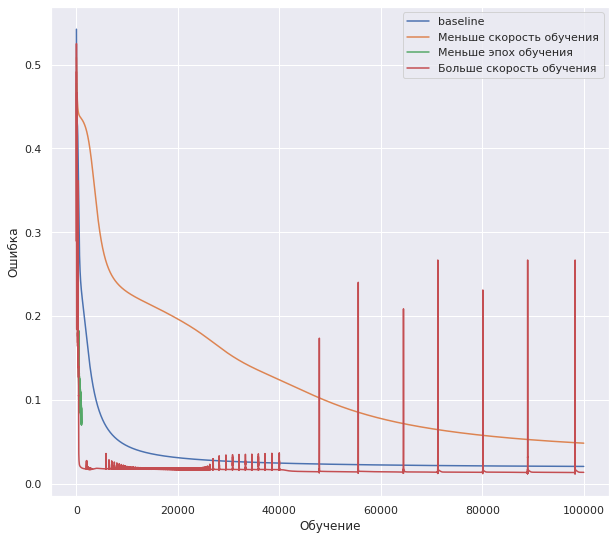

In [11]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения

for i in result.values():
    plt.plot(i)

plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend(result.keys())
plt.show() # расскоментируйте, чтобы посмотреть 


При слишком большой скорости обучения, быстрее уменьшается ошибка, но также растет вероятность "проскочить" минимум и никокда в него не попасть. 
При маленькой скорости обучения ошибка снижается медленнее и может потребоваться больше эпох обучения, чтобы достигнуть минимума.
При маленьком количестве эпох обучения, есть вероятность не достигнуть минимума.